In [199]:
import pandas as pd
import numpy as np
import os
import pickle as pkl
import matplotlib.pyplot as plt

In [200]:
data_folder = os.path.expanduser("~/computacoes-dados/PNAD/")
doc_file = "dicionario_PNAD_CONTINUA_MICRODADOS_5_visita_2017.xls"
data_file = "PNADC_2017_entr5.txt"
doc_path = os.path.join(data_folder, doc_file)
data_path = os.path.join(data_folder, data_file)

In [201]:
doc_data = pd.read_excel(doc_path)

In [73]:
vars = doc_data.iloc[3:, [1, 2]].values

In [74]:
vars = vars[~pd.isnull(vars[:, 0])]

In [80]:
raw_data = pd.read_fwf(data_path, widths=vars[:, 0], names=vars[:, 1])

In [81]:
raw_data.to_feather(os.path.join(data_folder, "pnad_2017.feather"))

In [85]:
pd.unique(raw_data.VD5005)

array([   0.,  394.,  223., ..., 8533., 5714., 6035.])

In [237]:
col = "VD5005"
data = raw_data[~pd.isnull(raw_data[col])]
values = data[col]

In [238]:
values.quantile(0.5)

667.0

In [234]:
25000 * 12 * 20

6000000

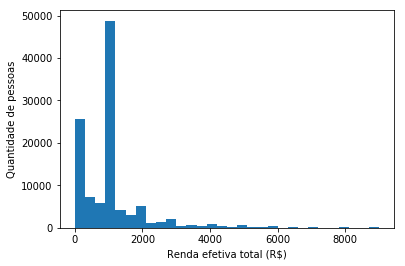

In [235]:
plt.hist(values, range=(values.quantile(0), values.quantile(0.99)), bins=30)
plt.xlabel("Renda efetiva total (R$)")
plt.ylabel("Quantidade de pessoas")
plt.show()

In [236]:
values.quantile(0.9)

2174.0

In [100]:
np.std(raw_data[~pd.isnull(raw_data.VD5005)].VD5005)

2080.741462577534

In [204]:
len(values)

445205